# Running Elegant with XOPT + Archiving

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
import sys
import os
lume_path = ''
sys.path.append(lume_path + 'openPMD-beamphysics')
sys.path.append(lume_path + 'distgen')
sys.path.append(lume_path + 'xopt')
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [2]:
# Import the class
from xopt import Xopt

### Make YAML and Run with Random Inputs

In [18]:
# Make a proper input file. 
YAML="""
xopt: {output_path: output , verbose: true, algorithm: cnsga}

algorithm:
  name: cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}
  
simulation: 
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant  
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
#    L2_10_50_phase: [30, 70]
    L2_10_25_phase: [30, 60]
#    X_MAX: [0.5e-3, 3.0e-3]
#    DX: [0.9e-3, 1.1e-3]
#    DP: [10.0e-5, 18.0e-5]
  objectives:
    sigma_pz: MINIMIZE
    norm_emit_x: MINIMIZE
#    sigma_t: MINIMIZE
#    ptp_t: MINIMIZE
#    core_pz: MINIMIZE
#    core_current: MAXIMIZE
  constraints:
 #   sigma_pz: [LESS_THAN, 4.0e+6]
    norm_emit_x: [LESS_THAN, 0.6e-6]
    ptp_t: [LESS_THAN, 6.0e-14]
  #  sigma_t: [LESS_THAN, 3.0e-15]
  #  mean_pz: [GREATER_THAN, 6.0e+9]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_25_phase}
  constants: 
#    L1_9_25_phase: 65.108
#    L2_10_25_phase: 57.0
    L3_10_25_volt: 1.6628471874e+7
    L3_10_50_volt: 1.6628471874e+7
    X_MAX: 5.0e-3
    DX: 1.1e-3
    DP: 16.0e-5
    INPUT_FILE: /global/u2/a/aedelen/elegant_example/elegant_particles.txt
    sample_interval: 1000
    elename: 'LCLS2cuH.ele'
    ltename: 'LCLS2cuH.lte'
    ELEGANT_BIN: '/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant'
    HDF5_BIN: '/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/epics/extensions/bin/linux-x86_64/sdds2hdf'
    path_search: '"/global/homes/a/aedelen/GitHub/lcls-lattice/elegant, /global/homes/a/aedelen/GitHub/lcls-lattice/elegant/rmat,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/wakefields,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/beams"'
    finput_name: 'HXRSTART.out'
    foutput_name: 'HXRSTART.h5'
  #  timeout: 180
    

"""



In [19]:
X = Xopt(YAML)

Loading config as text


In [ ]:
X

In [ ]:
!pwd

In [44]:
!which elegant

/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant


In [20]:
X.random_evaluate()

/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant LCLS2cuH.ele -macro=L1_9_50_phase=31.20642786424856  -macro=L1_9_25_phase=56.50982121117625  -macro=L1_10_25_phase=51.54669678746815  -macro=X1_Xband_phase=-60.644486965920464  -macro=L2_10_25_phase=58.3390698279174  -macro=L3_10_25_volt=16628471.874  -macro=L3_10_50_volt=16628471.874  -macro=X_MAX=0.005  -macro=DX=0.0011  -macro=DP=0.00016  -macro=INPUT_FILE=/global/u2/a/aedelen/elegant_example/elegant_particles.txt  -macro=sample_interval=1000  -macro=L2_10_50_phase=58.3390698279174 


{'sigma_pz': 29233040.354312345,
 'norm_emit_x': 7.82030886376985e-07,
 'sigma_t': 7.107539967029794e-14,
 'mean_pz': 6132848051.954169,
 'charge': 9.989999999999999e-11,
 'ptp_t': 2.587850444121776e-13,
 'core_norm_emit_x': 3.5328584495998873e-07,
 'core_pz': 1709440.2297145687,
 'core_current': 582.8218667770752,
 'archive': './output/beams/elegant_sim_82fa2d10fcd035846f360cca1f124b1c.h5'}

In [22]:
!ls 

LCLS2cuH.ele  LCLS2cuH.lte


In [10]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/u2/a/aedelen/elegant_example/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_1

## Run GA

In [21]:
# Pick one of these
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [22]:
# Change max generations
X.algorithm['options']['max_generations'] = 3
X.run(executor=executor)

Starting at time 2020-11-11T13:50:31-08:00



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm
Version 0.4.1

Creating toolbox from vocs.
Warning in cnsga_toolbox: Redefining creator.Individual
Created toolbox with 5 variables, 3 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'DP': 0.00016,
               'DX': 0.0011,
               'ELEGANT_BIN': '/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant',
               'HDF5_BIN': '/global/

In [11]:
#settings = {'L1_10_25_phase': 48.10988000636041,
#'L1_9_25_phase': 7.722087823054991,
#'L1_9_50_phase': -34.63546794399416,
#'L2_10_50_phase': -49.99535063902283,
#'X1_Xband_phase': 97.87343465656124,
#'L2_10_25_phase': 55.5}

In [12]:
#X.evaluate(settings)

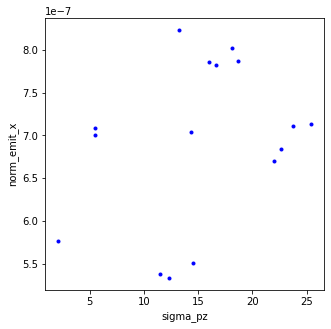

In [13]:
# Extract objectives from output
import numpy as np
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.population['outputs']]
y = [o[key2] for o in X.population['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(x, y, color='blue')
ax.plot(np.asarray(x)/1.0e6, np.asarray(y),'.', color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)

## Load Data from Json

In [14]:
from xopt.dataset import load_all_xopt_data

In [15]:
from glob import glob
jlist = glob('output/gen*json')
jlist

['output/gen_2.json', 'output/gen_3.json', 'output/gen_1.json']

In [16]:
DAT = load_all_xopt_data(jlist)


In [17]:
DAT

,L1_10_25_phase,L1_9_25_phase,L1_9_50_phase,L2_10_25_phase,X1_Xband_phase,L3_10_25_volt,L3_10_50_volt,X_MAX,DX,DP,...,sigma_pz,norm_emit_x,sigma_t,mean_pz,charge,ptp_t,core_norm_emit_x,core_pz,core_current,archive
0,44.314369,68.035213,66.313356,56.437994,-84.788578,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.797692e+07,3.786709e-06,1.056904e-14,6.023676e+09,1.462500e-10,6.579608e-14,1.136846e-06,1.532954e+07,6397.489880,./output/beams/elegant_sim_0ea7ace150f8a21eed5...
1,46.956676,77.075817,69.631050,39.549708,-70.156062,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.445789e+07,1.026315e-06,9.978950e-14,4.905283e+09,1.408500e-10,4.743450e-13,6.454527e-07,1.431358e+06,839.423250,./output/beams/elegant_sim_a55f9823656f48ebc5f...
2,53.430242,60.277471,63.264557,42.606126,-50.463942,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.382496e+07,1.062505e-06,2.282222e-13,5.143203e+09,1.176000e-10,8.491964e-13,3.569223e-07,1.097413e+06,211.714691,./output/beams/elegant_sim_5cad907150c8abf36b3...
3,52.930458,64.336766,39.832456,39.866171,-67.320921,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.427333e+07,1.060299e-06,2.941823e-13,4.921314e+09,1.194000e-10,1.100776e-12,3.046986e-07,8.582901e+05,154.099667,./output/beams/elegant_sim_0d79f5f666cce7e9c86...
4,51.045277,76.946600,56.164432,38.971646,-75.254327,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.121716e+07,1.197620e-06,6.168777e-14,4.854400e+09,1.402500e-10,3.590549e-13,8.698700e-07,1.986172e+06,1099.194584,./output/beams/elegant_sim_49fc0558fe4725214d5...
5,58.134528,66.986124,40.502824,39.671068,-80.690373,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,7.730208e+06,1.732432e-06,1.172514e-13,4.903176e+09,1.360500e-10,5.532321e-13,6.207666e-07,7.545707e+05,419.803418,./output/beams/elegant_sim_16cf9d3cd5cc218e6c9...
6,58.505195,68.860578,65.219349,56.930826,-75.661960,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.411853e+07,1.771401e-06,1.225363e-14,6.061544e+09,1.437000e-10,6.451823e-14,1.040067e-06,1.340656e+07,4887.293330,./output/beams/elegant_sim_023f0a43ffbabb523c0...
7,46.234946,78.188031,64.604425,50.959533,-94.602722,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,5.349099e+07,1.304610e-06,2.133362e-13,5.716678e+09,1.494000e-10,9.017546e-13,3.467732e-07,1.187821e+06,349.853022,./output/beams/elegant_sim_1aa0e4fb6796407985f...
8,59.936165,73.597475,64.472498,50.100669,-110.618783,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,6.412132e+07,1.226985e-06,2.935656e-13,5.671393e+09,1.126500e-10,1.032705e-12,3.002483e-07,1.290707e+06,145.487900,./output/beams/elegant_sim_7a79fbf313337c3acd9...
9,41.805955,77.151575,42.309866,30.393587,-70.965418,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.807373e+07,1.124713e-06,4.085124e-13,4.136557e+09,1.267500e-10,1.553001e-12,3.248667e-07,7.034300e+05,154.124206,./output/beams/elegant_sim_91ffccbcc2c0c96615f...


In [32]:
#see archive file list --> particle distributions

In [33]:
DAT['archive']

0     ./output/beams/elegant_sim_b9b3c722388d2e60b1a...
1     ./output/beams/elegant_sim_52022390a2bc5ebfac7...
2     ./output/beams/elegant_sim_fd657347d4f73cb1732...
3     ./output/beams/elegant_sim_9dda6954e775ee6d4fc...
4     ./output/beams/elegant_sim_012be6b2854ebe0f33e...
5     ./output/beams/elegant_sim_7eb936ab0c3dd7b8798...
6     ./output/beams/elegant_sim_255bb68520ade83af2e...
7     ./output/beams/elegant_sim_9abb2a68c7b66ef87b2...
8     ./output/beams/elegant_sim_873bce93a021be488d0...
9     ./output/beams/elegant_sim_407023c4a0f44110374...
10    ./output/beams/elegant_sim_fd22ddc9cc1d1a90b9f...
11    ./output/beams/elegant_sim_7464291a6a465af59c7...
12    ./output/beams/elegant_sim_4ab0cae6e0eb028a7b1...
13    ./output/beams/elegant_sim_d8f7d5bcb6b89da7256...
14    ./output/beams/elegant_sim_26b6ece90a9e8c8e3b6...
15    ./output/beams/elegant_sim_f4b9c8474f3c99e2a48...
16    ./output/beams/elegant_sim_a37ca2f4bfded31ee76...
17    ./output/beams/elegant_sim_8db37fef5cc0fd5

In [34]:
DAT['archive'][0]

'./output/beams/elegant_sim_b9b3c722388d2e60b1a9c29cadc45190.h5'

## Load Particle Distribution

In [35]:
from pmd_beamphysics import ParticleGroup
from h5py import File
import h5py

In [36]:
with h5py.File(DAT['archive'][0], 'r') as h5:
    print(list(h5.attrs))

['basePath', 'chargeUnitSI', 'dataType', 'numParticles', 'openPMD', 'openPMDextension', 'particlesPath', 'speciesType', 'totalCharge']


In [39]:
# This will convert to a data dict
P = ParticleGroup(DAT['archive'][10])
P

<ParticleGroup with 662 particles at 0x2aaad6755460>

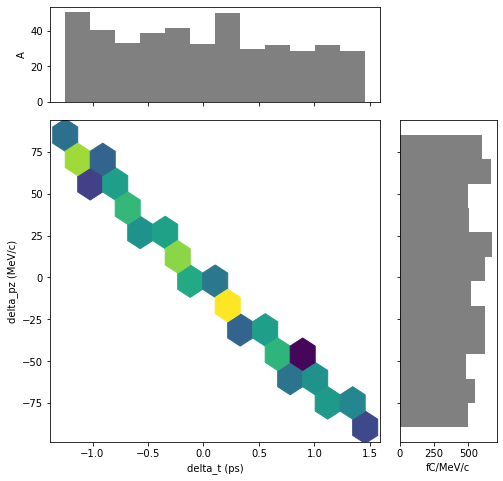

In [40]:
P.plot('delta_t', 'delta_pz', figsize=(8,8))

In [25]:
P['mean_energy'], P.units('mean_energy')

(4907887656.724352, pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0)))

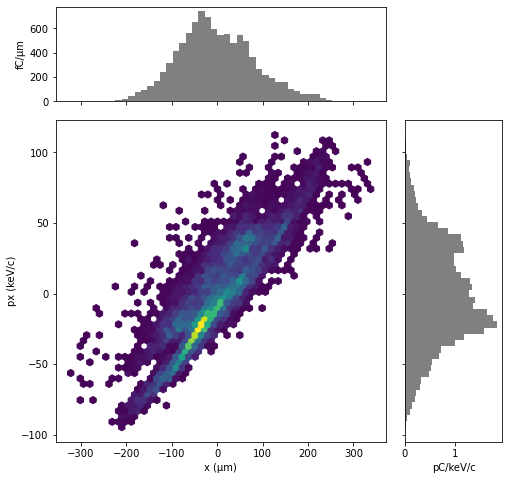

In [26]:
P.plot('x', 'px', figsize=(8,8))

In [27]:
P2=P.where(P.x < P['mean_x'])

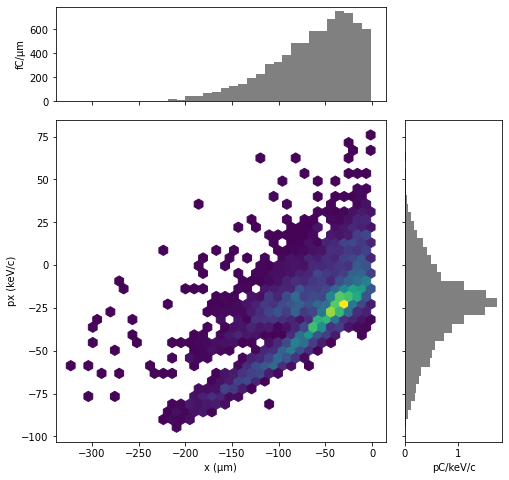

In [28]:
P2.plot('x', 'px', figsize=(8,8))